In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(r'C:\Users\Radhika\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
#take top five data in dataframe using with head function
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
#check how many rows and columns in a dataframe
data.shape

(1470, 35)

we have total 1470 rows and 35 columns

there no null values are present

In [9]:
#find some more information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

above information tells datatypes here we have int type and object type.
we have total 26 numerical and 9 objects columns.

In [10]:
#check null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

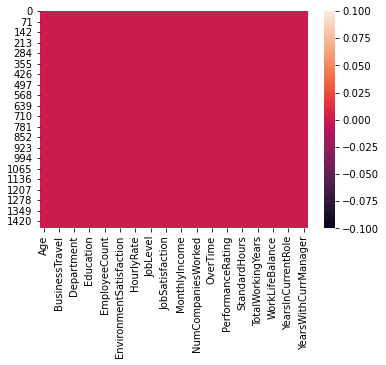

In [11]:
# checking null values with heatmap
sns.heatmap(data.isnull())

no null values are present

In [12]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- No missing values in the dataset
- we have 26 numerical and 9 objects columns
- Though features are not normaly distributed, are close to normality
- minimum age is 18 and mix is 60 which is logical
- min hour rate is 30.00 and mean is 65.00 and max 100
- Standard Hours are 80.
- Each feature has difference scale range


In [13]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

here 3 coulms are in unique there are EmployeeCount,OverTime and StandardHours these are one unique values unique value so better to drop it  

In [14]:
#droping useless columns
df=data.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


here it is dataframe after droped 3 columns

<AxesSubplot:xlabel='Attrition', ylabel='count'>

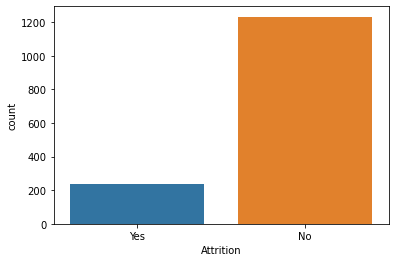

In [12]:
#let’s visualize the count of target variable using Seaborn
sns.countplot(df['Attrition'])

here it is imabalnced

# EDA

In [13]:
#Let’s look at the correlation between the variables
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<function matplotlib.pyplot.show(close=None, block=None)>

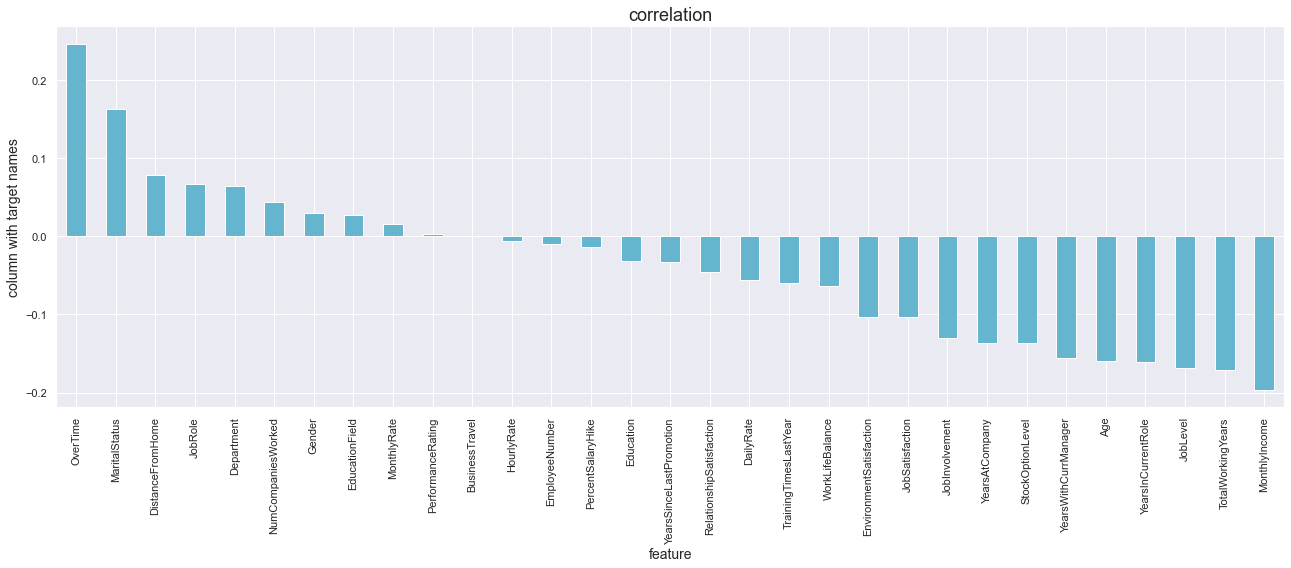

In [35]:
#visualize correlation 
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

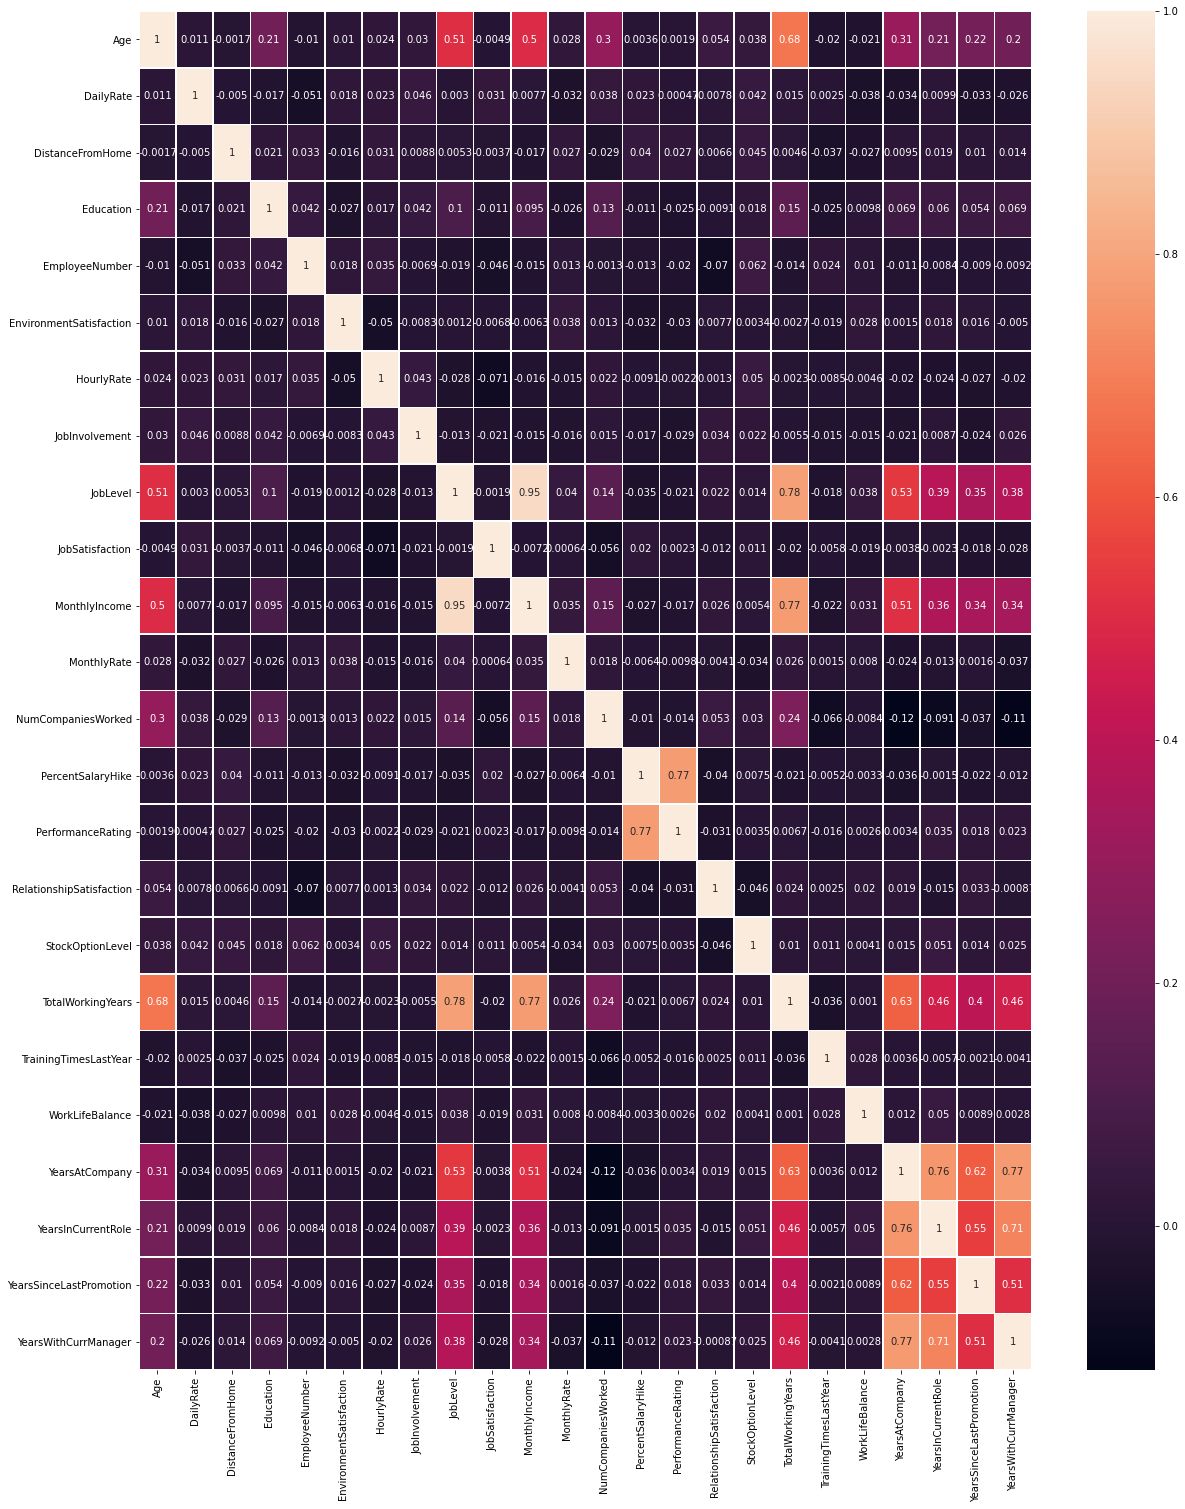

In [14]:
#heat map
fig, ax = plt.subplots(figsize=(20,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

TotalWorkingYear having positive correlation
with Age that means there are are empl working from long time,with monthly income means got hike on salaries as well because of long years in companywith yearsincurrentrole and currentmanager means when you working from long time on same role with same manager as well
PercentOfHike a correlation with PerfomanceRating means the perfomance helps to get hike.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

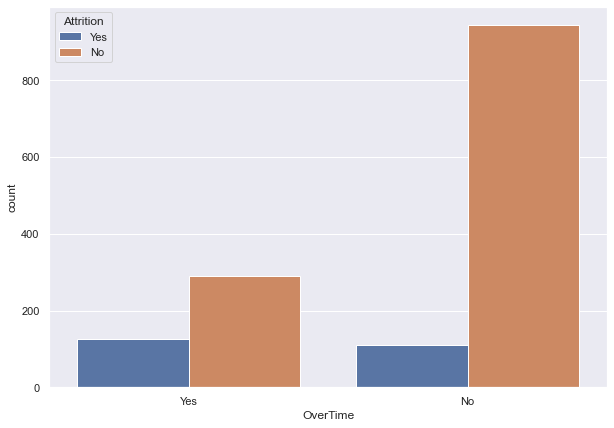

In [15]:
#let’s visualize the count of employeee over time using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='OverTime', hue='Attrition',data= df )

most of the employees are no working overtime in the company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

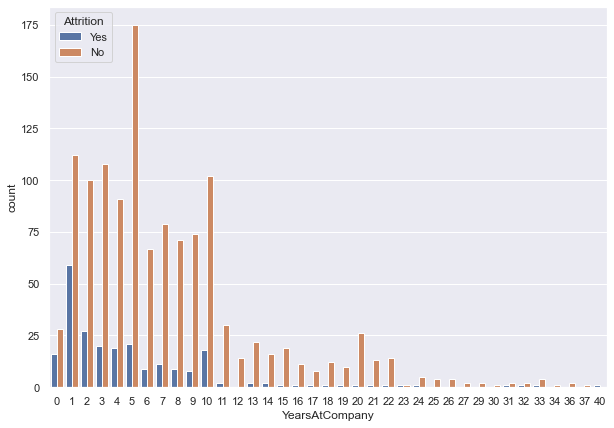

In [16]:
#let’s visualize the count of YearsAtCompany using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='YearsAtCompany', hue='Attrition',data= df )

around 100 to 125 empl are working from 2, 3, 4 adn 11 year in company,around 175 empl are working from 5 years in company,very less no of empl are working from 10 year more

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

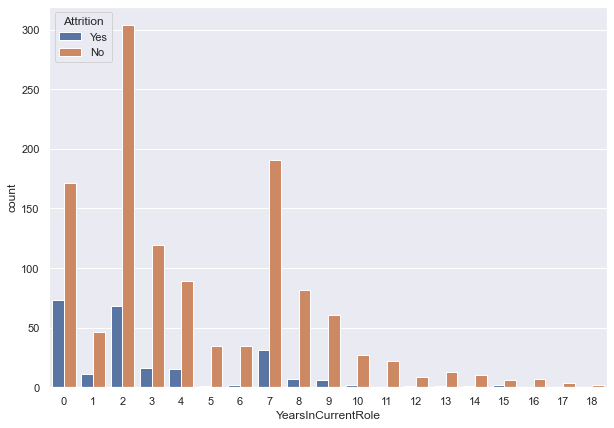

In [17]:
#let’s visualize the count of YearsInCurrentRole using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='YearsInCurrentRole', hue='Attrition',data= df )

around 170 empl are working from less than a year old in company
around 300 empl are working on same role not promoted
we one more larger figure around 190 empl are working from 7 years on same role not promoted

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

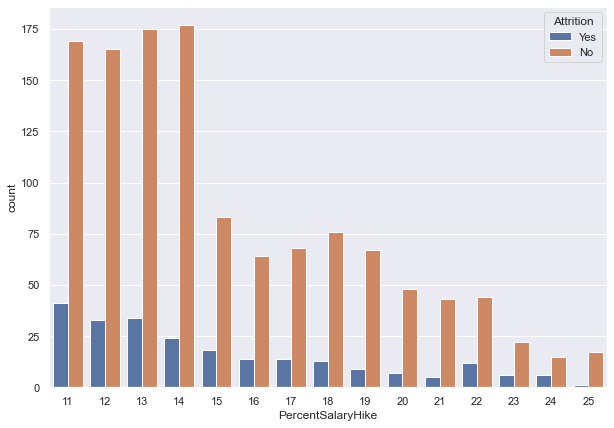

In [18]:
#let’s visualize the count of PercentSalaryHike using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='PercentSalaryHike', hue='Attrition',data= df )

most of hike given is 11,12,13,14 to maximum employees,more than 15% hike given less employees are must be working from very long

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

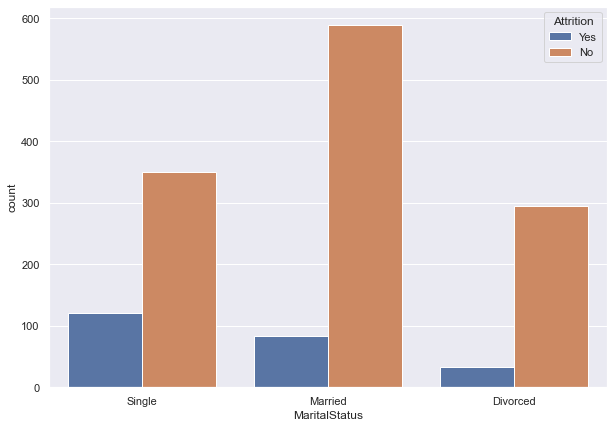

In [19]:
#let’s visualize the count of MaritalStatus using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='MaritalStatus', hue='Attrition',data= df )

Here married empoyees are more and around 350 peoples are single and divorce are around 300

<AxesSubplot:xlabel='Age', ylabel='count'>

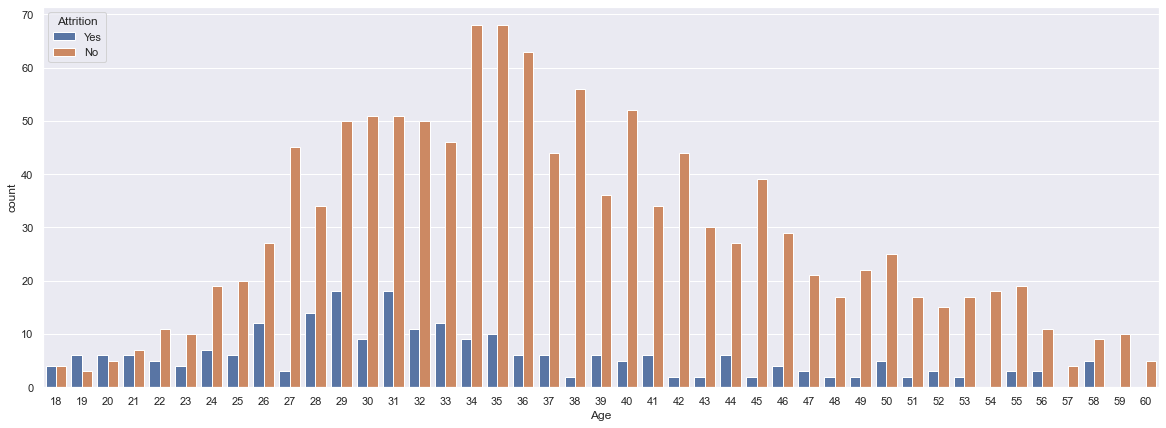

In [20]:
#let’s visualize the count of Age using Seaborn
plt.figure(figsize=(20, 7))
sns.countplot(x='Age', hue='Attrition',data= df )

maximum no.of employees are age in 34,35,36,37 those are working,majority employees are working in the age of 27 to 45,in the age of 18 are same both equal

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

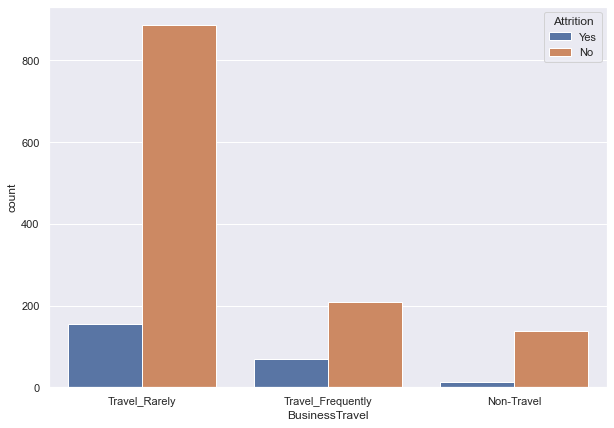

In [21]:
#let’s visualize the count of BusinessTravel using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='BusinessTravel', hue='Attrition',data= df )

max working are in Travel_Rarely category,In other two category we have very less employee and there is very less attrition in Non-Travel category

<AxesSubplot:xlabel='Department', ylabel='count'>

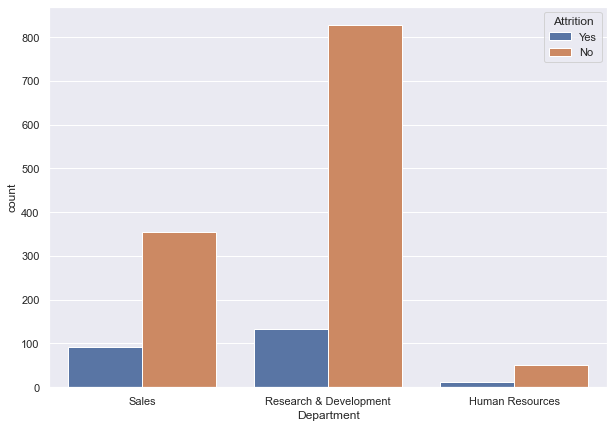

In [22]:
#let’s visualize the count of Department using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='Department', hue='Attrition',data= df )

most of working peoples are working in department of research and development,sales are worling around in 350 range and least are hr department

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

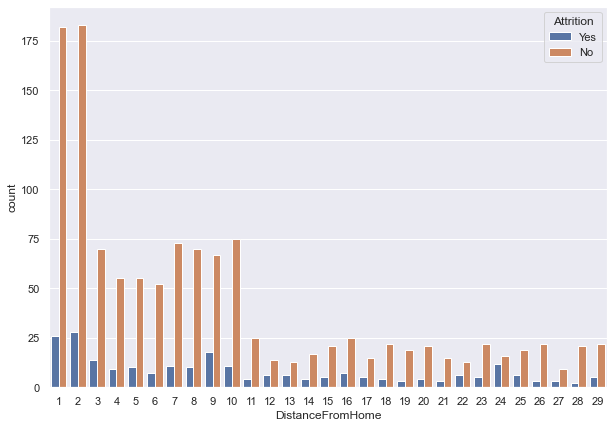

In [23]:
#let’s visualize the count of DistanceFromHome using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='DistanceFromHome', hue='Attrition',data= df )

working empolyees are distance from home im 1 to 10 rest of all short distance

<AxesSubplot:xlabel='Education', ylabel='count'>

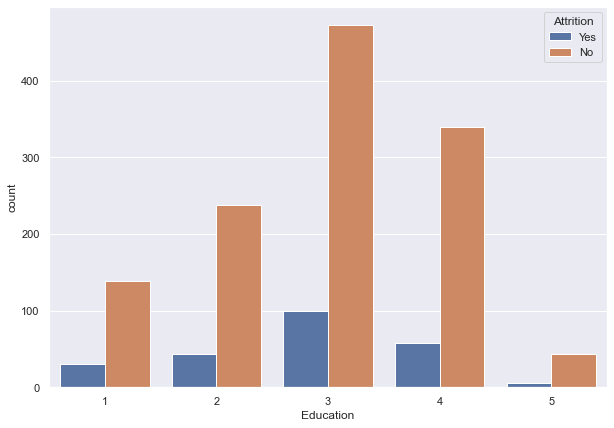

In [24]:
#let’s visualize the count of Education using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='Education', hue='Attrition',data= df )

very less employees in higher education,most of emp are middle educated and Attrition is also high in middle educated empl.

<AxesSubplot:xlabel='Gender', ylabel='count'>

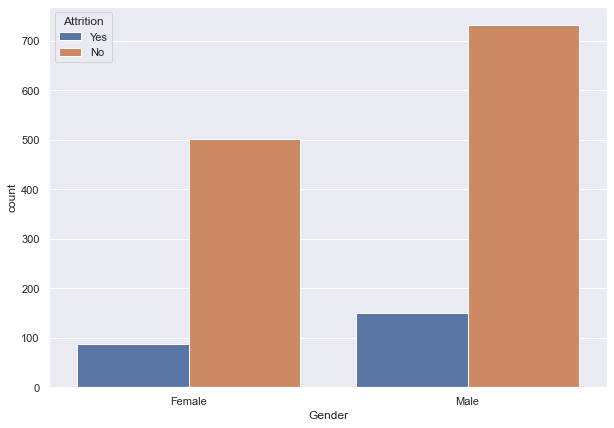

In [25]:
#let’s visualize the count of Gender using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='Gender', hue='Attrition',data= df )

almost same in both male and female

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

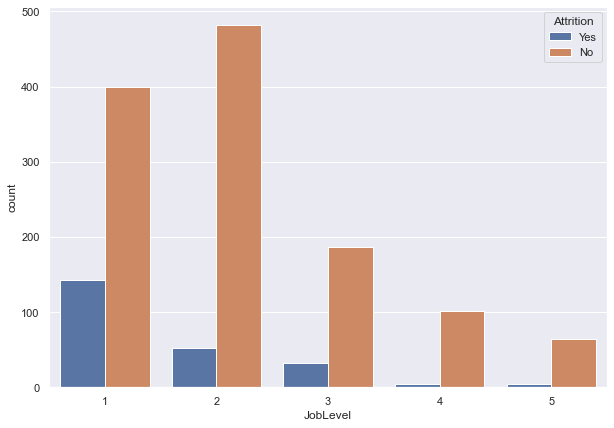

In [26]:
#let’s visualize the count of JobLevel using Seaborn
plt.figure(figsize=(10, 7))
sns.countplot(x='JobLevel', hue='Attrition',data= df )

max we see in 1&2 level we have more job roles in the range of 400 to 500 and 3,4,5 are less level

#### Using LabelEncoder for convering categorical to numerical

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,1,2,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,2,3,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,3,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,4,0,...,0,3,1,6,3,2,2,2,2,2


In [31]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

see all are converted into integer datatype 

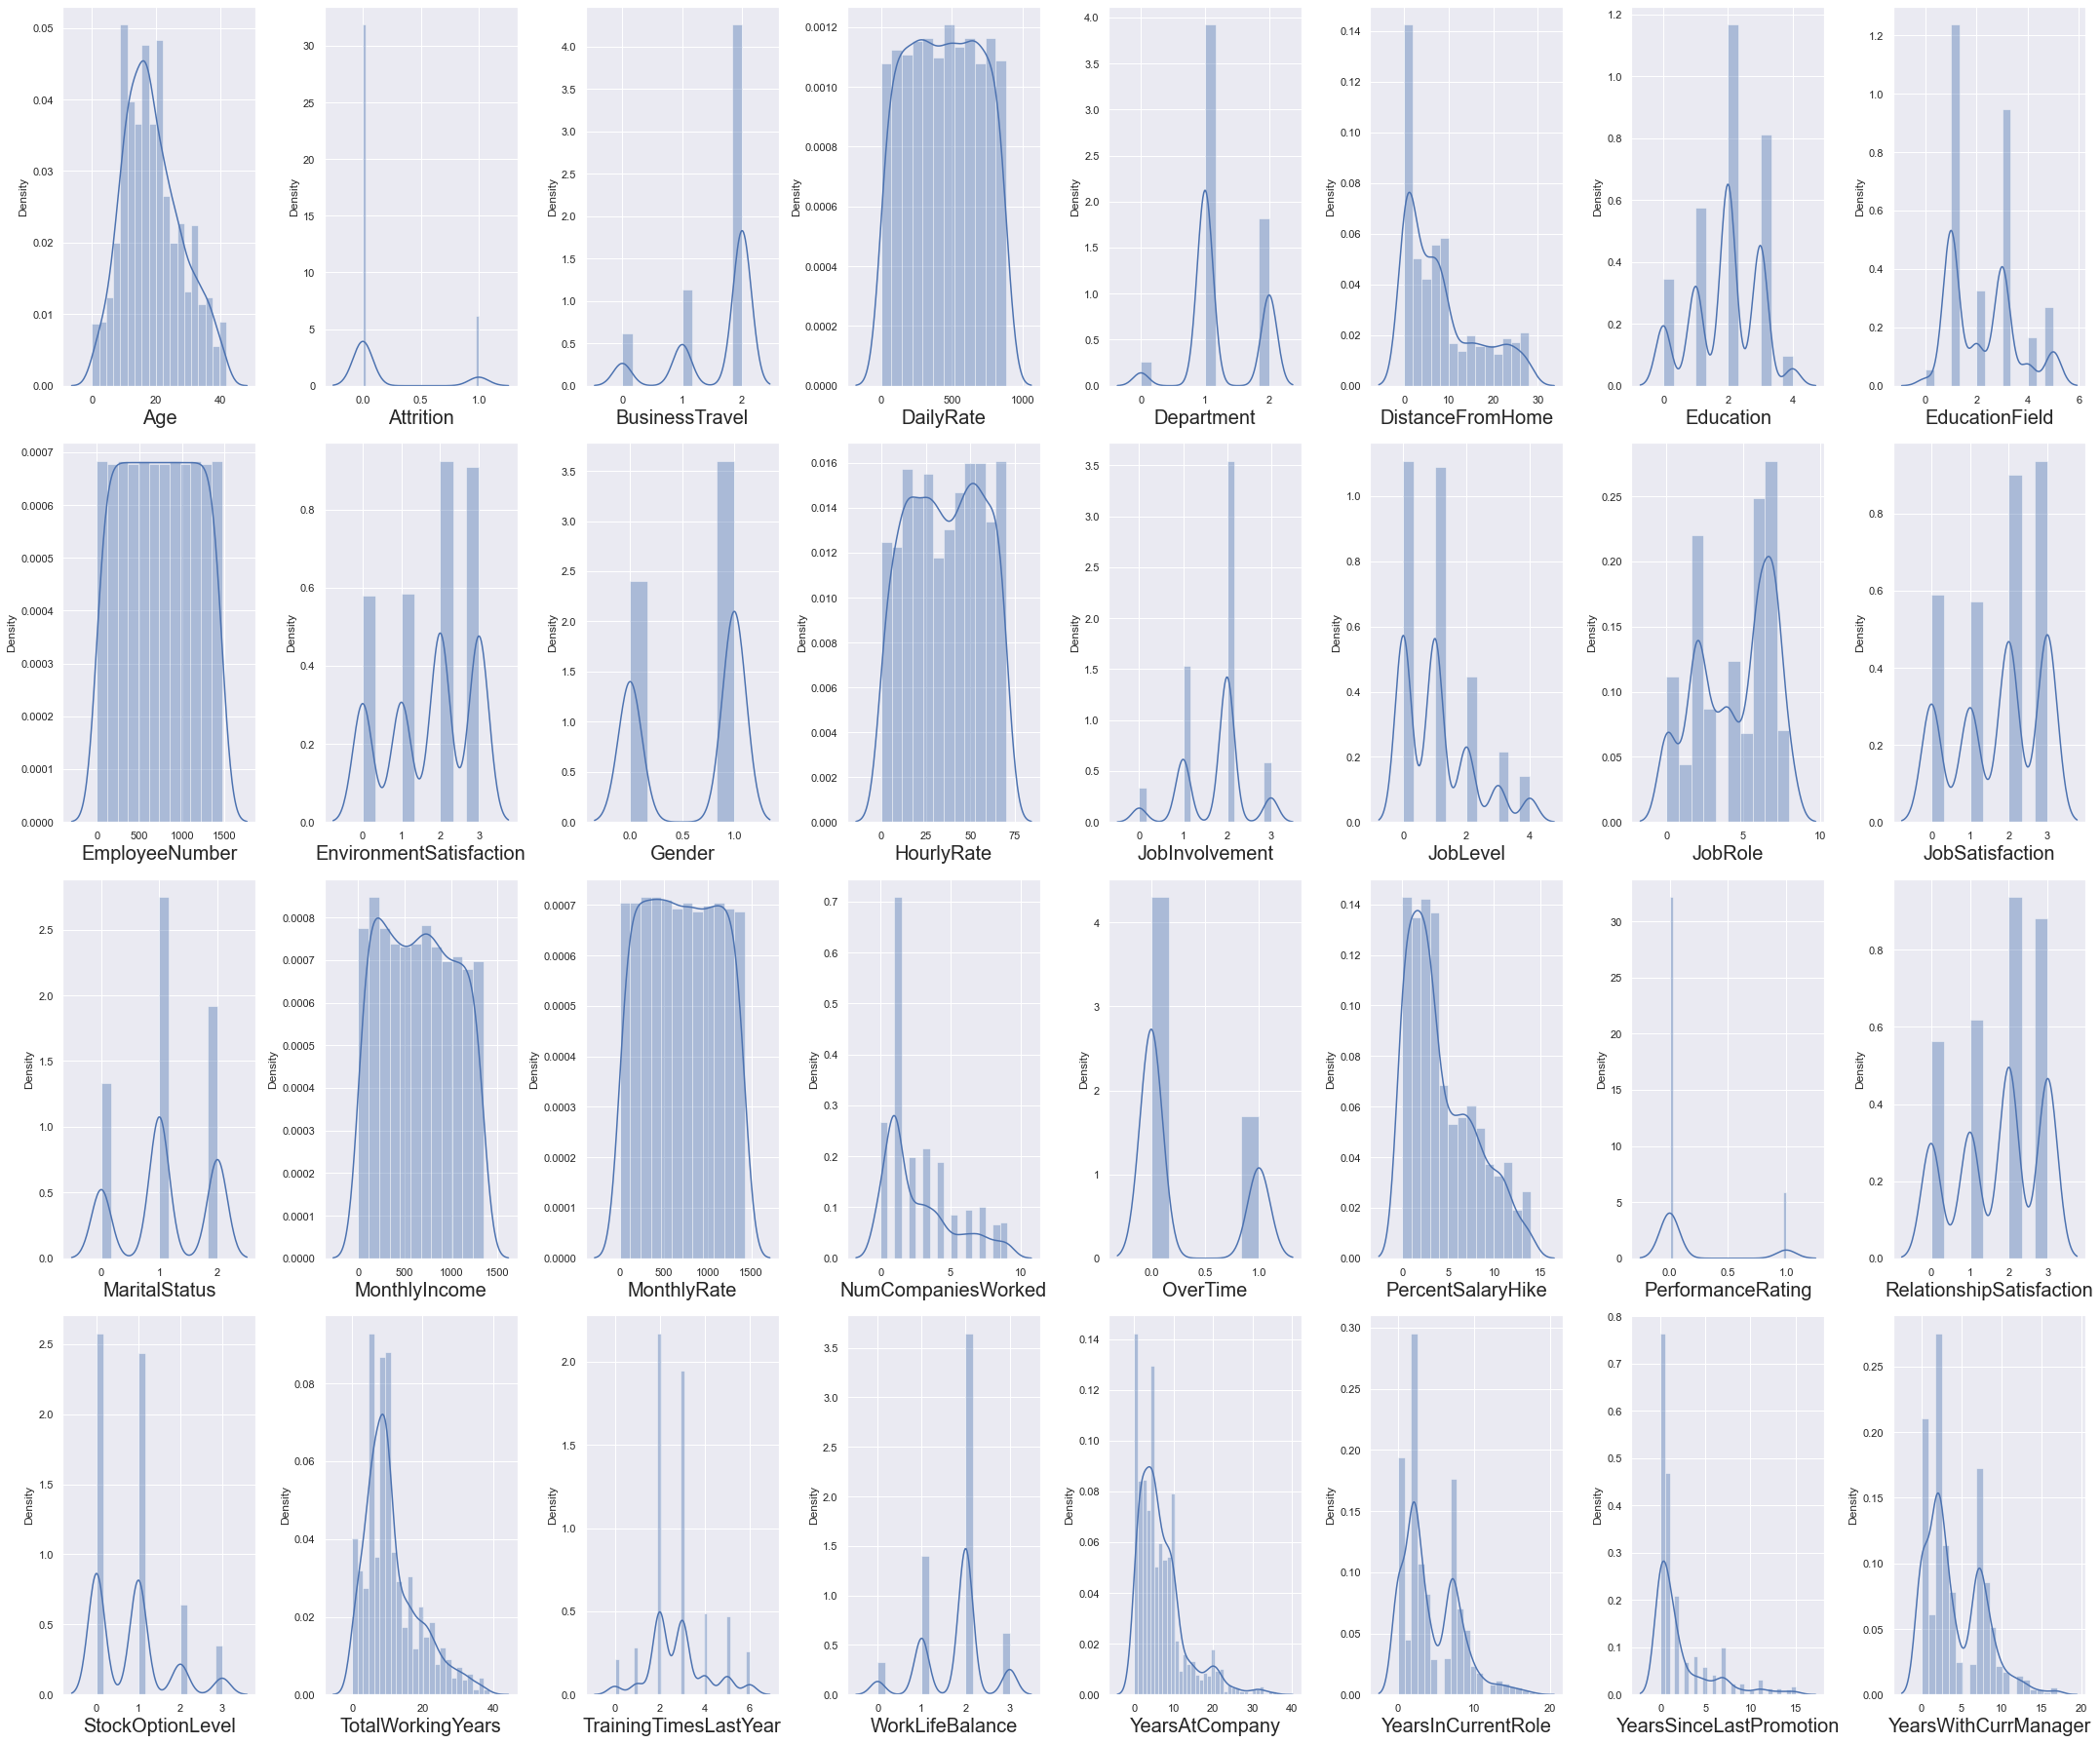

In [34]:
#how data distributed every column by visualization
plt.figure(figsize = (30,25))
plotnumber = 1

for column in df:
    if plotnumber<=32:
        ax = plt.subplot(4,8,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
               
    plotnumber+=1
plt.tight_layout()

he data distribution is normally distributed

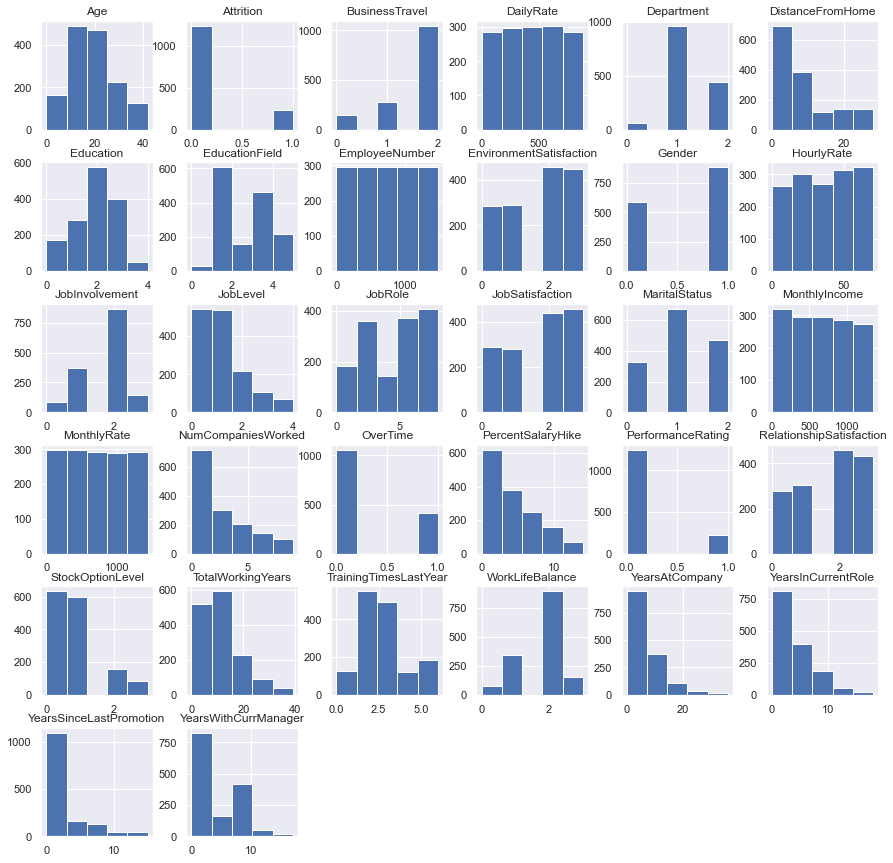

In [36]:
#Take a View of all features to gain insights
df.hist(bins=5, figsize=(15,15));

In [216]:
#check skew
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
W

we can see here most of the columns are skewed 

Outliers Handling

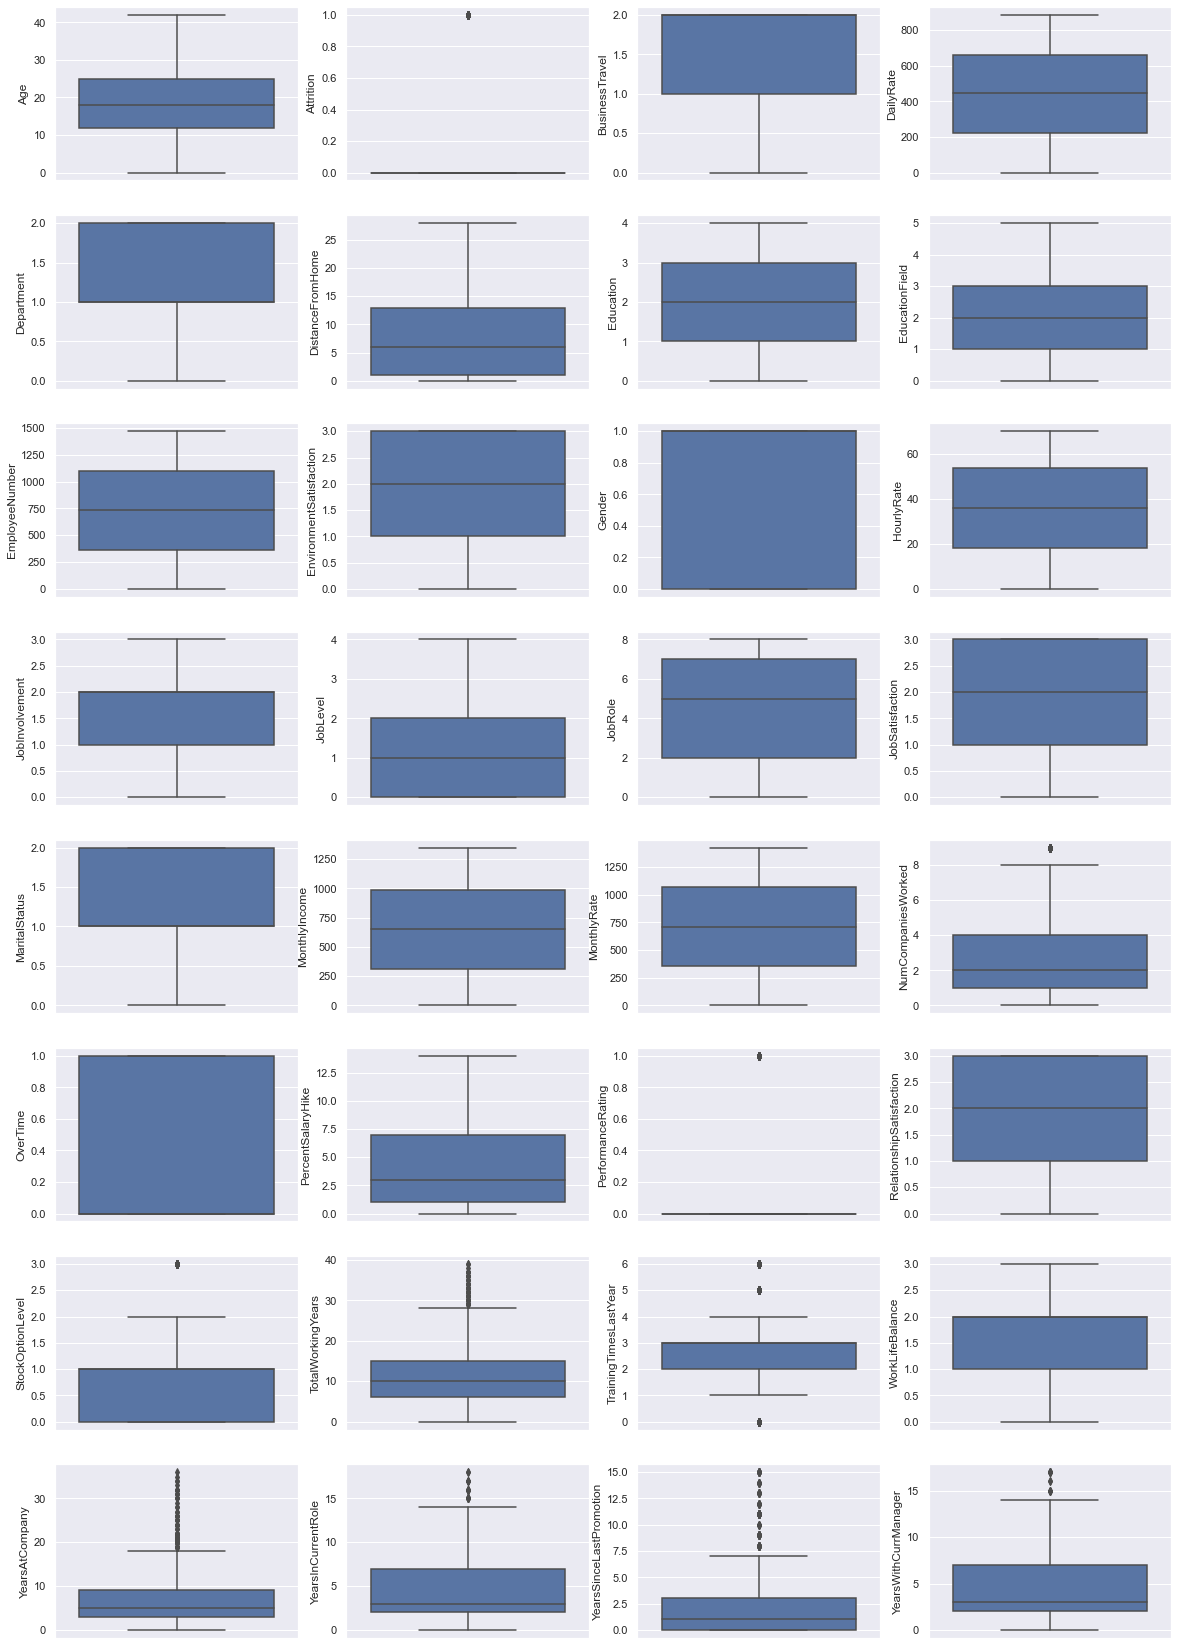

In [38]:
#use boxplot
fig,ax = plt.subplots(ncols=4,nrows=8,figsize=(20,30))
index=0
ax = ax.flatten()

for col, value in df.items():
    if col !='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+= 1

some of columns are having outliers

In [217]:
from scipy.stats import zscore
z=zscore(df)
z

array([[ 0.4463504 ,  2.28090588,  0.59004834, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.4384223 , -0.91319439, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  2.28090588,  0.59004834, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -0.4384223 ,  0.59004834, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.4384223 , -0.91319439, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.4384223 ,  0.59004834, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [218]:
threshold = 3
print (np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [219]:
df_new = df [(z<3).all(axis = 1)]

In [221]:
df.shape

(1470, 32)

In [222]:
df_new.shape

(1387, 32)

In [223]:
#data loss
(1470-1387)/1470*100

5.646258503401361

### checking for Skewness

In [224]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.002331
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [225]:
from sklearn.preprocessing import power_transform 
df_New=power_transform(df_new)
df_New=pd.DataFrame(df_New,columns=df_new.columns)

In [53]:
df_New.skew()

Age                        -0.016840
Attrition                   1.805983
BusinessTravel             -0.960583
DailyRate                  -0.284354
Department                  0.015095
DistanceFromHome           -0.060966
Education                  -0.150667
EducationField             -0.008642
EmployeeNumber             -0.288897
EnvironmentSatisfaction    -0.263063
Gender                     -0.417296
HourlyRate                 -0.263117
JobInvolvement             -0.044790
JobLevel                    0.067551
JobRole                    -0.337641
JobSatisfaction            -0.275767
MaritalStatus              -0.158253
MonthlyIncome              -0.253056
MonthlyRate                -0.269784
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike          -0.053027
PerformanceRating           1.931566
RelationshipSatisfaction   -0.248323
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
W

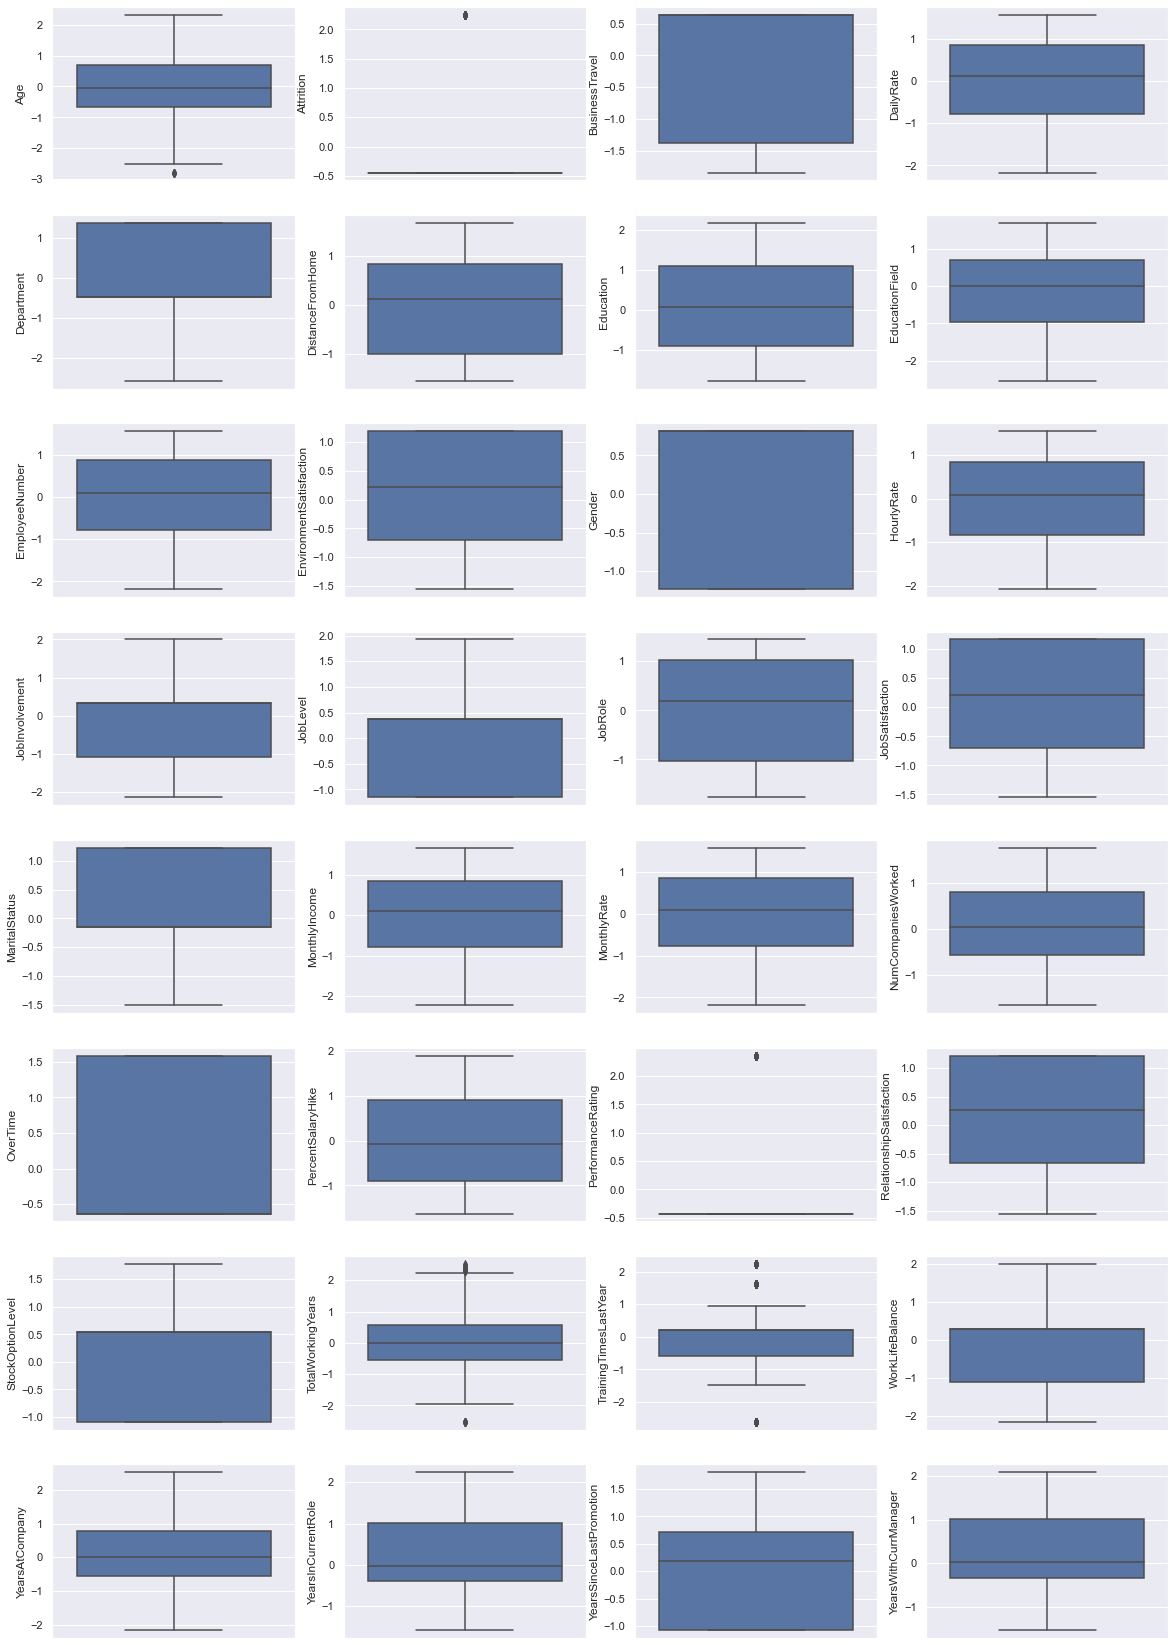

In [54]:
#use boxplot
fig,ax = plt.subplots(ncols=4,nrows=8,figsize=(20,30))
index=0
ax = ax.flatten()

for col, value in df_New.items():
    if col !='type':
        sns.boxplot(y=col,data=df_New,ax=ax[index])
        index+= 1

almost of columns seems outliers are removed some outliers are present that are not a problem.

In [99]:
df_New.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.594757,1,0.638730,0.726329,1.379881,-1.540425,-0.899027,-0.965129,-2.177581,-0.691543,...,-0.424765,-1.552370,-1.084263,-0.173231,-2.608524,-2.152206,0.231837,0.290524,-1.073534,0.582177
1,1.366338,0,-1.380776,-1.348018,-0.473500,0.253537,-1.781221,-0.965129,-2.163985,0.228695,...,2.354241,1.215498,0.548653,0.147620,0.217074,0.280173,0.948319,1.006575,0.193168,1.018073
2,0.172771,1,0.638730,1.320068,-0.473500,-1.001294,-0.899027,1.239552,-2.152329,1.190375,...,-0.424765,-0.670166,-1.084263,-0.351153,0.217074,0.280173,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.282470,0,-1.380776,1.367537,-0.473500,-0.659936,1.097612,-0.965129,-2.141777,1.190375,...,-0.424765,0.257322,-1.084263,-0.173231,0.217074,0.280173,0.621429,1.006575,1.027520,-1.528426
4,-1.057071,0,0.638730,-0.428653,-0.473500,-1.001294,-1.781221,0.689982,-2.131976,-1.551541,...,-0.424765,1.215498,0.548653,-0.544046,0.217074,0.280173,-0.933983,-0.390769,0.722874,-0.347871


In [101]:
#split the data , seperate features and label
X = df_New.drop('Attrition', axis = 1)
y = df_New['Attrition']

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [105]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.594757,0.638730,0.726329,1.379881,-1.540425,-0.899027,-0.965129,-2.177581,-0.691543,-1.229911,...,-0.424765,-1.552370,-1.084263,-0.173231,-2.608524,-2.152206,0.231837,0.290524,-1.073534,0.582177
1,1.366338,-1.380776,-1.348018,-0.473500,0.253537,-1.781221,-0.965129,-2.163985,0.228695,0.813067,...,2.354241,1.215498,0.548653,0.147620,0.217074,0.280173,0.948319,1.006575,0.193168,1.018073
2,0.172771,0.638730,1.320068,-0.473500,-1.001294,-0.899027,1.239552,-2.152329,1.190375,0.813067,...,-0.424765,-0.670166,-1.084263,-0.351153,0.217074,0.280173,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.282470,-1.380776,1.367537,-0.473500,-0.659936,1.097612,-0.965129,-2.141777,1.190375,-1.229911,...,-0.424765,0.257322,-1.084263,-0.173231,0.217074,0.280173,0.621429,1.006575,1.027520,-1.528426
4,-1.057071,0.638730,-0.428653,-0.473500,-1.001294,-1.781221,0.689982,-2.131976,-1.551541,0.813067,...,-0.424765,1.215498,0.548653,-0.544046,0.217074,0.280173,-0.933983,-0.390769,0.722874,-0.347871


In [106]:
x.shape

(1387, 31)

In [107]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1382    0
1383    0
1384    0
1385    0
1386    0
Name: Attrition, Length: 1387, dtype: int64

## Data Imbalanced

<AxesSubplot:xlabel='Attrition', ylabel='count'>

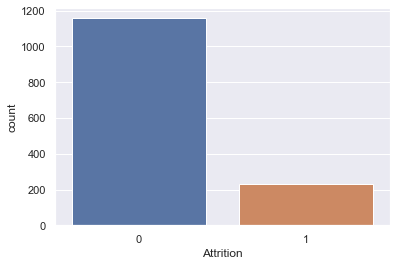

In [108]:
#let’s visualize the count of target variable using Seaborn
sns.countplot(df_New['Attrition'])

here data is in imbalanced now treat to in balanced data
we have total around 200 in yes and around 1200 in no.

In [109]:
#convert imbalanced data into balance data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x , y = SM.fit_resample(x,y)

In [114]:
y.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

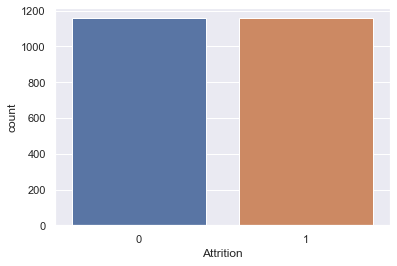

In [121]:
#let’s visualize the count of target variable using Seaborn
sns.countplot(y)

Now we have balaced data for model training

In [16]:
# we can also to create the simple report of EDA quikly and easily
profile = ProfileReport(df,title = 'Pandas Profile Report',explorative = True)

In [17]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/45 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

wow perform EDA is the best possible way using pandas profile and it will show all the eda in one table format correlation visulize with heatmap and variables,missing values,linear relationship etc it will show in a minutes

# Model Building

In [197]:
##import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [123]:
#split train test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)

In [124]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1737, 31), (579, 31), (1737,), (579,))

In [125]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       884
           1       0.79      0.99      0.88       853

    accuracy                           0.86      1737
   macro avg       0.89      0.86      0.86      1737
weighted avg       0.89      0.86      0.86      1737

[[653 231]
 [  8 845]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       274
           1       0.75      0.98      0.85       305

    accuracy                           0.82       579
   macro avg       0.86      0.81      0.81       579
weighted avg       0.86      0.82      0.81       579

[[175  99]
 [  5 300]]


In [127]:
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

Training accuracy:: 0.8624064478986759
Test accuracy:: 0.8203799654576857


In [128]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.7836858568555896


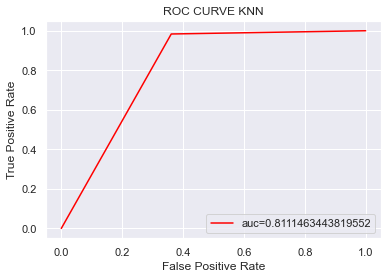

The Score for the ROC Curve is : 81.11%


In [135]:
#roc_curve plot to check the socre of knn
sns.set_theme(style="darkgrid")
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color='red', label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [136]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       853

    accuracy                           1.00      1737
   macro avg       1.00      1.00      1.00      1737
weighted avg       1.00      1.00      1.00      1737

[[884   0]
 [  0 853]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       274
           1       0.98      0.91      0.94       305

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

[[267   7]
 [ 28 277]]


In [138]:
print("Training accuracy::",RFC.score(x_train,y_train))
print("Test accuracy::",RFC.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.9395509499136442


In [137]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8959819766142847


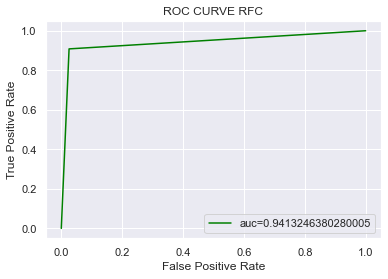

The Score for the ROC Curve is : 94.13%


In [140]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color='green',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [141]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       853

    accuracy                           1.00      1737
   macro avg       1.00      1.00      1.00      1737
weighted avg       1.00      1.00      1.00      1737

[[884   0]
 [  0 853]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       274
           1       0.83      0.86      0.85       305

    accuracy                           0.84       579
   macro avg       0.84      0.83      0.84       579
weighted avg       0.84      0.84      0.84       579

[[222  52]
 [ 43 262]]


In [142]:
print("Training accuracy::",DecisionTree.score(x_train,y_train))
print("Test accuracy::",DecisionTree.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8359240069084629


In [143]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.7440120652416773


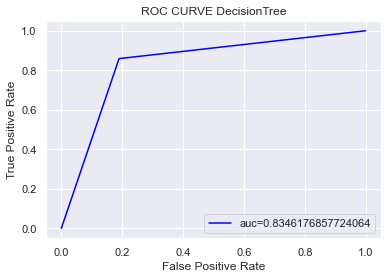

The Score for the ROC Curve is : 83.46000000000001%


In [144]:
#roc_curve plot to check the socre of Decisiontree
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color = 'blue',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [145]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       884
           1       0.80      0.82      0.81       853

    accuracy                           0.81      1737
   macro avg       0.81      0.81      0.81      1737
weighted avg       0.81      0.81      0.81      1737

[[712 172]
 [152 701]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       274
           1       0.80      0.79      0.79       305

    accuracy                           0.78       579
   macro avg       0.78      0.78      0.78       579
weighted avg       0.78      0.78      0.78       579

[[213  61]
 [ 64 241]]


In [146]:
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

Training accuracy:: 0.8134715025906736
Test accuracy:: 0.7841105354058722


In [147]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.7711951664556491


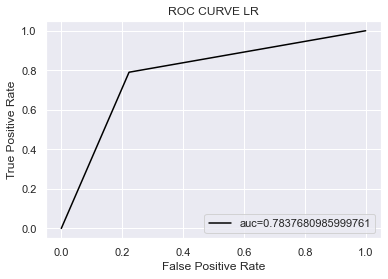

The Score for the ROC Curve is : 78.38000000000001%


In [149]:
#roc_curve plot to check the socre of LogesticRegression
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color = 'black' ,label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# ENSEMBLE TECHNIQUES

In [164]:
#train result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_pred =adb .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       884
           1       0.92      0.92      0.92       853

    accuracy                           0.92      1737
   macro avg       0.92      0.92      0.92      1737
weighted avg       0.92      0.92      0.92      1737

[[816  68]
 [ 69 784]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       274
           1       0.92      0.90      0.91       305

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579

[[251  23]
 [ 30 275]]


In [165]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.9211283822682786
Test accuracy:: 0.9084628670120898


In [166]:
print(cross_val_score(adb,x,y,cv=10).mean())

0.8160266457680251


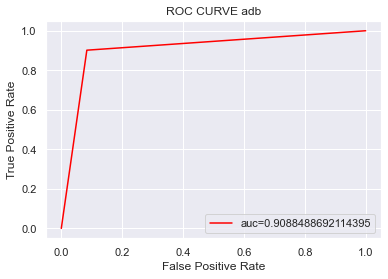

The Score for the ROC Curve is : 90.88000000000001%


In [167]:
#roc_curve plot to check the socre of adb
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color = 'red', label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE adb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [168]:
#train result
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
adb = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred =gbc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       884
           1       0.99      0.96      0.98       853

    accuracy                           0.98      1737
   macro avg       0.98      0.98      0.98      1737
weighted avg       0.98      0.98      0.98      1737

[[877   7]
 [ 34 819]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       274
           1       0.95      0.89      0.92       305

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

[[260  14]
 [ 33 272]]


In [169]:
print("Training accuracy::",gbc.score(x_train,y_train))
print("Test accuracy::",gbc.score(x_test,y_test))

Training accuracy:: 0.9763960852043754
Test accuracy:: 0.918825561312608


In [170]:
print(cross_val_score(gbc,x,y,cv=10).mean())

0.8765636662188389


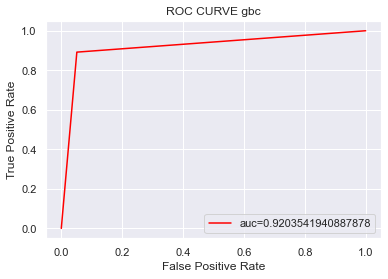

The Score for the ROC Curve is : 92.04%


In [171]:
#roc_curve plot to check the socre of gbc
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color = 'red', label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE gbc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [172]:
#train result
bgc = BaggingClassifier()
bgc.fit(x_train, y_train)
y_pred =bgc .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
bgc = BaggingClassifier()
bgc.fit(x_train, y_train)
y_pred =bgc .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       853

    accuracy                           1.00      1737
   macro avg       1.00      1.00      1.00      1737
weighted avg       1.00      1.00      1.00      1737

[[883   1]
 [  3 850]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       274
           1       0.93      0.90      0.91       305

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579

[[253  21]
 [ 31 274]]


In [173]:
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Training accuracy:: 0.9913644214162349
Test accuracy:: 0.9101899827288429


In [174]:
print(cross_val_score(bgc,x,y,cv=10).mean())

0.8747648902821317


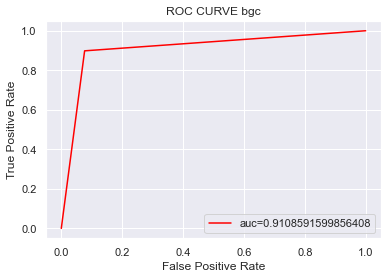

The Score for the ROC Curve is : 91.09%


In [175]:
#roc_curve plot to check the socre of bgc
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color = 'red', label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE bgc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

### model choosing

RandomForestClassifier as final model,for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well
Rest of the models having huge difference between train and test accuracies so not considering them.

# Hyper Parameter Tuning

In [176]:
from scipy.stats import randint

In [181]:
parameters={'max_depth':list(range(200,400,50)),
            'n_estimators':list(range(10,120,20)),
            'max_features': ['auto', 'sqrt', 'log2'],
         }

In [182]:
model=RandomForestClassifier()

In [183]:
grid_clf=GridSearchCV(model,parameters,verbose=4,refit=True)

In [184]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.2s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=50; total time=   0.4s
[CV 2/5] END max_depth=20

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [185]:
clf=grid_clf.best_estimator_
print(clf)

RandomForestClassifier(max_depth=300, n_estimators=70)


In [186]:
clf=grid_clf.best_params_
print(clf)

{'max_depth': 300, 'max_features': 'auto', 'n_estimators': 70}


In [187]:
clf=grid_clf.best_score_
print(clf)

0.9366739540892377


In [191]:
clf = RandomForestClassifier(max_depth=300, n_estimators=700)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9430051813471503

In [192]:
y_pred=clf.predict(x_test)

In [193]:
accuracy_score(y_test,y_pred)

0.9430051813471503

In [194]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8985709763908544


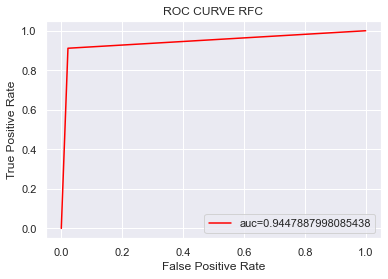

The Score for the ROC Curve is : 94.48%


In [195]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,color='red',label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

As we notice after HYPER PARAMETER TUNING models accuracy score got increased it became 95% accuracy

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms,it can be used for both classification and regression tasks.random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.The algorithm is also a great choice for anyone who needs to develop a model quickly. On top of that, it provides a pretty good indicator of the importance it assigns to our features.

# Saving Model

In [204]:
import joblib
joblib.dump(clf,'IBM_HR_Attrition_Rate_Analytics')

['IBM_HR_Attrition_Rate_Analytics']